# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Made Vidyatma Adhi Krisna]
- **Email:** [krisnahmbtn@gmail.com]
- **ID Dicoding:** [adhi_krisna]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola tren rata-rata konsentrasi PM2.5 di berbagai station pada setiap quartalnya?
- Pertanyaan 2 : Bagaimana Bagaimana hubungan antara konsentrasi polutan utama yaitu PM2.5 dan NO2 dipengaruhi oleh perubahan suhu (TEMP), tekanan udara (PRES), dan kecepatan angin (WSPM)?

## Import Semua Packages/Library yang Digunakan

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import display


## Data Wrangling

### Gathering Data (Merging)

Karena semua file csv pada dataset ini memiliki tabel data yang sama, maka yang harus dilakukan hanyalah merge semua .csv file, dan simpan pada direktori data



In [275]:
#cek file merged_data.csv apakah sudah ada di dalam direktori data
if os.path.exists('data/merged_data.csv'):
    print('File merged_data.csv sudah ada di dalam direktori data')
    merged_df = pd.read_csv('data/merged_data.csv')
else:
    print('Membuat merged_data.csv di dalam direktori data')
    data_folder = 'data' # data sebagai direktori penyimpanan dataset
    csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
    dfs = [pd.read_csv(os.path.join(data_folder, f)) for f in csv_files]
    merged_df = pd.concat(dfs, ignore_index=True)

    # simpan file merged_data.csv di dalam direktory data
    merged_df.to_csv('data/merged_data.csv', index=False)

File merged_data.csv sudah ada di dalam direktori data


**Insight:** <br>
Semua dataset .csv dalam direktori "data" atau pada berbagai station telah disimpan dalam satu dataset merged_data.csv, dan telah diakses oleh satu dataframe merged_df



### Assessing Data

tampilkan 5 data terbawah dan teratas dengan bantuan library IPython untuk cek apakah dataframe merged_df sudah menyimpan seluruh data pada merged_data.csv

In [276]:
display(merged_df.head())
display(merged_df.tail())

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [277]:
merged_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

    Buat dataframe baru bernama used_df dengan tujuan hanya mengambil tabel data yang akan digunakan untuk analisis data sesuai tujuan pertanyaan bisnis saja 

In [278]:
used_df = merged_df[['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3','TEMP', 'PRES', 'WSPM', 'station']]

In [279]:
display(merged_df.head())
display(merged_df.tail())
display(merged_df.info())


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


None

Ganti nama kolom PM2.5 karena nama kolom tidak seharusnya mengandung (.)

In [280]:
used_df.rename(columns={'PM2.5': 'PM25'}, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12372\962984875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df.rename(columns={'PM2.5': 'PM25'}, inplace=True)


Cek jumlah missing value pada setiap tabel data

In [281]:
used_df.isna().sum()


year           0
month          0
day            0
hour           0
PM25        8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
WSPM         318
station        0
dtype: int64

Cek apakah ada data yang aneh atau invalid atau tidak seharusnya

In [282]:
used_df.describe(include='all')

,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,1.729711,NaN
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,1.246386,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,2.200000,NaN


Cek apakah terdapat duplikasi data

In [283]:
print(f'Jumlah duplikasi data: {used_df.duplicated().sum()}')

Jumlah duplikasi data: 0


Cek apakah ada outlier

In [284]:
for col in used_df.select_dtypes(include=[np.number]).columns:
    q25, q75 = np.percentile(used_df[col].dropna(), 25), np.percentile(used_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in used_df[col] if x < minimum or x > maximum]
    print(f'Kolom {col}: {len(outliers)} outliers')

Kolom year: 0 outliers
Kolom month: 0 outliers
Kolom day: 0 outliers
Kolom hour: 0 outliers
Kolom PM25: 19142 outliers
Kolom PM10: 14658 outliers
Kolom SO2: 35566 outliers
Kolom NO2: 7021 outliers
Kolom CO: 28054 outliers
Kolom O3: 16599 outliers
Kolom TEMP: 0 outliers
Kolom PRES: 0 outliers
Kolom WSPM: 23079 outliers


Untuk bisa menggunakan interpolasi time saat data cleaning, bikin satu tabel data baru bernama "datetime" dengan mengambil data year, month, day, dan hour

In [285]:
# Buat kolom baru 'datetime' dengan menggabungkan kolom 'year', 'month', 'day', dan 'hour'
used_df['datetime'] = pd.to_datetime(used_df[['year', 'month', 'day', 'hour']])
# used_df.set_index('datetime', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12372\3756170840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df['datetime'] = pd.to_datetime(used_df[['year', 'month', 'day', 'hour']])


**Insight:**
- Terdapat beberapa missing value pada beberapa tabel data yang nantinya akan digunakan dalam analisis data untuk menjawab pertanyaan bisnis yang sudah dirumuskan
- Tidak terdapat data yang aneh atau invalid value
- Terdapat beberapa data yang outliers. Tapi ini adalah penemuan sementara dengan menggunakan method dropna() pandas yang artinya data outliers yang ditemukan adalah hasil dari mengabaikan baris data yang missing values

### Cleaning Data

##### Bersihkan Data Missing Values

In [286]:
print("Jumlah data missing pada setiap kolom:")
used_df.isna().sum()

Jumlah data missing pada setiap kolom:


year            0
month           0
day             0
hour            0
PM25         8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
WSPM          318
station         0
datetime        0
dtype: int64

In [287]:
# print("Cuplikan data yang missing pada setiap kolom : ")
# display(used_df[used_df.PM25.isna()])
# display(used_df[used_df.NO2.isna()])
# display(used_df[used_df.TEMP.isna()])
# display(used_df[used_df.DEWP.isna()])
# display(used_df[used_df.PRES.isna()])
# display(used_df[used_df.WSPM.isna()])

# sengaja dikomen karena outputnya terlalu panjang

Replace missing values dengan mask method dilanjutkan dengan interpolasi metode linear

In [288]:
for col in used_df.select_dtypes(include=[np.number]).columns:
    q1 = used_df[col].quantile(0.25)
    q3 = used_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace missing values dengan mask method
    used_df.loc[:, col] = used_df[col].mask((used_df[col] < lower_bound) | (used_df[col] > upper_bound))
    # lanjut interpolasi missing values dengan metode linear
    used_df.loc[:, col] = used_df[col].interpolate(method='linear')
    
# used_df.loc[:, 'PM25'] = used_df['PM25'].interpolate(method='time')
    


Ternyata setelah dilakukan mask method dan interpolasi, masih terdapat sisa 3 missing values pada kolom data WSPM (wind speed/kecepatan angin), lalu masalah selesai setelah diberikan median value

In [289]:
display(used_df.isna().sum())
used_df.loc[:, 'WSPM'] = used_df.loc[:, 'WSPM'].fillna(used_df.loc[:, 'WSPM'].median())
display(used_df.isna().sum())


year        0
month       0
day         0
hour        0
PM25        0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
WSPM        3
station     0
datetime    0
dtype: int64

year        0
month       0
day         0
hour        0
PM25        0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
WSPM        0
station     0
datetime    0
dtype: int64

Ternyata setelah dilakukan mask method dan interpolasi, masih terdapat beberapa data yang outliers pada kolom PM25 dan SO2

In [290]:
print("Setelah dilakukan mask method dan interpolasi :")

missing_values = used_df.isna().sum()

# Hitung jumlah outliers pada setiap kolom
outliers_count = {}
for col in used_df.select_dtypes(include=[np.number]).columns:
    q25, q75 = np.percentile(used_df[col].dropna(), 25), np.percentile(used_df[col].dropna(), 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in used_df[col] if x < minimum or x > maximum]
    outliers_count[col] = len(outliers)

# tabel untuk jumlah missing values dan outliers
summary_table = pd.DataFrame({
    'Kolom': missing_values.index,
    'Jumlah Missing Values': missing_values.values,
    'Jumlah Outliers': [outliers_count.get(col, 0) for col in missing_values.index]
})

display(summary_table)

Setelah dilakukan mask method dan interpolasi :


,Kolom,Jumlah Missing Values,Jumlah Outliers
0,year,0,0
1,month,0,0
2,day,0,0
3,hour,0,0
4,PM25,0,1082
5,PM10,0,0
6,SO2,0,8237
7,NO2,0,0
8,CO,0,0
9,O3,0,0


##### Bersihkan Data Outliers

Coba kita teliti mengapa penyebab outliers PM25 dan SO2

In [291]:
#cek lower bound dan upper bound dari kolom PM25 dan SO2
for col in ['PM25', 'SO2']:
    q1 = used_df[col].quantile(0.25)
    q3 = used_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f'Lower bound {col}: {lower_bound}\nUpper bound {col}: {upper_bound}')


Lower bound PM25: -115.0
Upper bound PM25: 245.0
Lower bound SO2: -21.0
Upper bound SO2: 43.0


Box plot di bawah ini menampilkan visualisasi sisa data yang outlier pada kolom PM25. Terlihat sekilas bahwa data yang terdeteksi outlier ternyata masih sangat dekat dengan batas upper_bound yaitu 245 untuk PM25, dan juga 43 untuk SO2. Jadi saya anggap data tersebut bisa digunakan

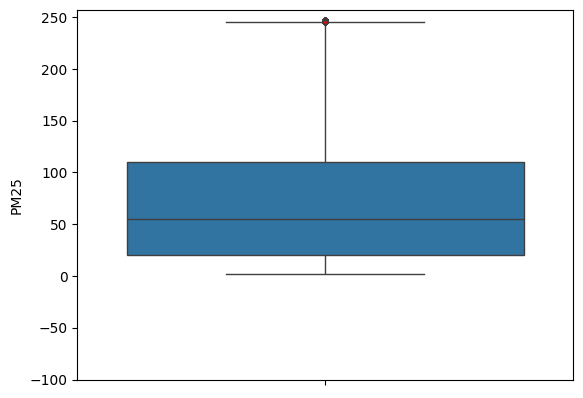

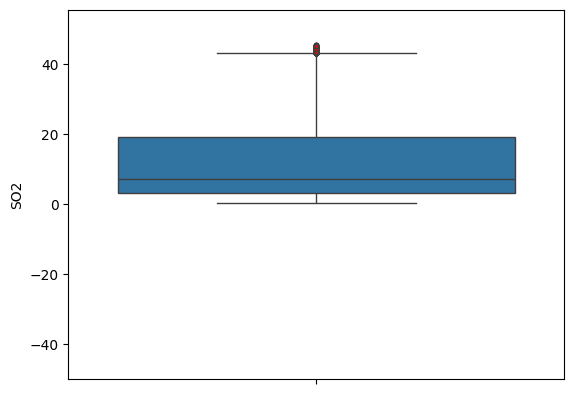

In [292]:
sns.boxplot(used_df['PM25'], flierprops=dict(markerfacecolor='r', marker='o', markersize=3))
plt.ylim(-100, used_df['PM25'].max() + 10)  
plt.show()
sns.boxplot(used_df['SO2'], flierprops=dict(markerfacecolor='r', marker='o', markersize=3))
plt.ylim(-50, used_df['SO2'].max() + 10)  
plt.show()

Kita coba untuk cek korelasi antar tabel dataframe nya, bisa lihat hubungan antara PM25 lumayan tinggi dengan CO dan PM10

In [293]:
used_df.select_dtypes(include=[np.number]).corr()

,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.048784,-0.063636,-0.162633,-0.058893,-0.052739,-0.015486,-0.152312,0.187214,0.106836
month,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,-0.000189,-0.031036,-0.207937,0.037128,0.043716,-0.122493,0.132502,-0.013835,-0.156758
day,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.000861,0.025075,0.001384,0.013869,-0.004880,-0.001733,0.014219,0.021971,-0.003731
hour,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.009065,0.055177,0.039739,-0.009803,-0.025430,0.289767,0.142173,-0.038464,0.156089
PM25,-4.878419e-02,-1.890330e-04,8.614541e-04,9.064918e-03,1.000000,0.881837,0.496055,0.643935,0.770608,-0.169578,-0.091899,-0.012880,-0.300989
PM10,-6.363615e-02,-3.103607e-02,2.507452e-02,5.517732e-02,0.881837,1.000000,0.498826,0.656436,0.691602,-0.134440,-0.066156,-0.043618,-0.238856
SO2,-1.626333e-01,-2.079371e-01,1.384058e-03,3.973924e-02,0.496055,0.498826,1.000000,0.524859,0.579751,-0.189857,-0.358849,0.262509,-0.101614
NO2,-5.889289e-02,3.712808e-02,1.386921e-02,-9.803363e-03,0.643935,0.656436,0.524859,1.000000,0.698217,-0.519892,-0.280779,0.180623,-0.418750
CO,-5.273894e-02,4.371561e-02,-4.880270e-03,-2.543030e-02,0.770608,0.691602,0.579751,0.698217,1.000000,-0.367419,-0.289723,0.163177,-0.354348
O3,-1.548565e-02,-1.224930e-01,-1.733340e-03,2.897669e-01,-0.169578,-0.134440,-0.189857,-0.519892,-0.367419,1.000000,0.607106,-0.457232,0.363754


Ternyata korelasi antara PM25 dan CO yang bernilai 0.7 sekian belum bisa menjadi alasan wajarnya data outlier pada PM25. <br>
Tapi korelasi antara PM25 dan PM10 lumayan memperlihatkan hubungan bahwa value di antara keduanya tegak lurus <br>


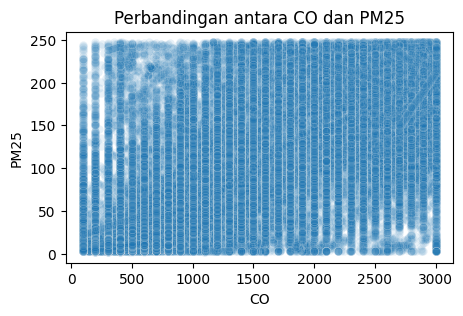

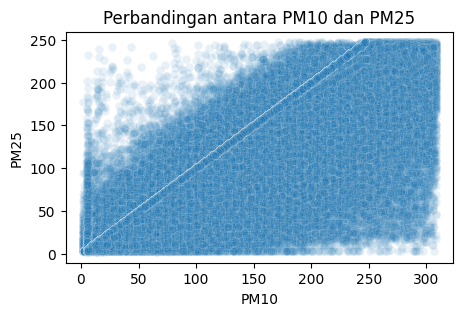

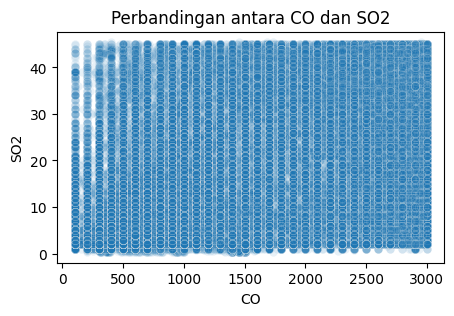

In [294]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='CO', y='PM25', data=used_df, alpha=0.1)    
plt.title('Perbandingan antara CO dan PM25')
plt.xlabel('CO')
plt.ylabel('PM25')
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='PM10', y='PM25', data=used_df, alpha=0.1)    
plt.title('Perbandingan antara PM10 dan PM25')
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.show()


plt.figure(figsize=(5, 3))
sns.scatterplot(x='CO', y='SO2', data=used_df, alpha=0.1)    
plt.title('Perbandingan antara CO dan SO2')
plt.xlabel('CO')
plt.ylabel('SO2')
plt.show()


**Insight:**
- Setelah dilakukan data cleaning dengan mask method dan interpolation metode linear, data missing value sudah berhasil digantikan namun menyebabkan beberapa data terdeteksi outlier
- Kolom PM25 sebagai peran utama dalam menjawab pertanyaan 1 dan 2, menjadi bagian dari kolom yang terdeteksi outliers. Tapi kita sudah melihat bahwa ternyata sebaran outliers nya tidak terlalu jauh atau sangat dekat dengan upper_bound nya, dan juga didukung oleh korelasi antara PM25 dengan PM10 yang ternyata berkorelasi positif, maka dari itu sekitar 1000 data pada kolom PM25 yang terdeteksi outlier, saya rasa tidak perlu di drop karena tidak akan merusak data keseluruhan, justru jika kita drop, akan membuang 1000 values yang mungkin berguna
- Kolom SO2 yang memiliki data outliers sebenarnya tidak perlu terlalu dibersihkan karena ternyata sebaran outliers nya juga tidak terlalu jauh atau sangat dekat dengan upper_bound nya. Bahkan sebenarnya kolom ini tidak digunakan untuk analisis data secara keseluruhan nantinya, karena peran utama pada pertanyaan 1 adalah PM25 dan datetime, sedangkan pertanyaan 2 adalah  (PM25 dan NO2) sebagai konsentrasi polutan utama 

## Exploratory Data Analysis (EDA)

### Explore used_df <br>
Melihat Rata-rata PM25 di tiap station

In [295]:
used_df.groupby('station')['PM25'].describe()


,count,mean,std,min,25%,50%,75%,max
station,,,,,,,,
Aotizhongxin,35064.0,76.062454,64.185433,3.0,22.0,58.0,113.00000,247.0
Changping,35064.0,67.519777,61.881479,2.0,18.0,46.0,99.00000,247.0
Dingling,35064.0,62.985344,61.598084,3.0,14.0,41.0,94.00000,247.0
Dongsi,35064.0,79.230306,66.865007,3.0,23.0,61.0,118.19774,247.0
Guanyuan,35064.0,77.073004,64.251643,2.0,23.0,59.0,114.00000,247.0
Gucheng,35064.0,77.672908,64.635494,2.0,24.0,60.0,115.00000,247.0
Huairou,35064.0,66.161683,60.813392,2.0,17.0,47.0,97.00000,247.0
Nongzhanguan,35064.0,77.489479,66.094601,2.0,22.0,59.0,115.00000,247.0
Shunyi,35064.0,73.901340,65.081724,2.0,19.0,55.0,111.00000,247.0


Mencoba menampilkan statistik mean PM25 pertahun dan perbulannya di setiap station

In [296]:
# Group by station and year, then calculate descriptive statistics for PM25

station_yearly_stats = used_df.groupby(['station', 'year'])['PM25'].describe().reset_index()
station_monthly_stats = used_df.groupby(['station', 'month'])['PM25'].describe().reset_index()

display(station_yearly_stats)
display(station_monthly_stats)

,station,year,count,mean,std,min,25%,50%,75%,max
0,Aotizhongxin,2013,7344.0,78.650123,63.891841,3.0,26.000000,62.000000,114.000000,247.0
1,Aotizhongxin,2014,8760.0,82.018836,63.361213,3.0,28.000000,67.000000,122.000000,247.0
2,Aotizhongxin,2015,8760.0,74.372934,64.405371,3.0,21.000000,55.000000,111.000000,247.0
3,Aotizhongxin,2016,8784.0,69.062551,61.719391,3.0,18.000000,49.000000,102.000000,247.0
4,Aotizhongxin,2017,1416.0,79.668116,78.359349,3.0,12.000000,46.000000,137.000000,247.0
5,Changping,2013,7344.0,70.306509,62.682100,2.0,19.000000,51.000000,106.000000,247.0
6,Changping,2014,8760.0,74.993642,66.030055,3.0,20.000000,53.000000,112.000000,247.0
7,Changping,2015,8760.0,65.766855,59.750681,3.0,20.000000,44.000000,94.000000,247.0
8,Changping,2016,8784.0,58.921505,55.653382,3.0,16.000000,40.000000,85.000000,247.0
9,Changping,2017,1416.0,71.012712,72.866580,3.0,13.000000,38.000000,112.000000,247.0


,station,month,count,mean,std,min,25%,50%,75%,max
0,Aotizhongxin,1,2976.0,81.424614,71.798427,3.0,16.0,62.0,136.000000,247.0
1,Aotizhongxin,2,2712.0,74.921460,72.947381,3.0,13.0,45.0,121.500000,247.0
2,Aotizhongxin,3,2976.0,89.613508,71.808369,3.0,23.0,73.0,140.706522,247.0
3,Aotizhongxin,4,2880.0,78.036806,56.451456,3.0,33.0,69.0,114.000000,247.0
4,Aotizhongxin,5,2976.0,66.150067,47.918615,3.0,31.0,54.0,89.000000,245.0
...,...,...,...,...,...,...,...,...,...,...
139,Wanshouxigong,8,2976.0,55.064012,41.729730,3.0,21.0,44.0,82.000000,244.0
140,Wanshouxigong,9,2880.0,61.137778,49.078194,3.0,21.0,48.0,90.000000,236.0
141,Wanshouxigong,10,2976.0,85.971102,73.740657,3.0,24.0,61.0,138.250000,247.0
142,Wanshouxigong,11,2880.0,94.382423,77.618218,3.0,21.0,76.0,159.000000,247.0


Melihat statistik mean PM25 pada setiap quartalnya di setiap station (pertanyaan 1)

In [297]:
# Tambahkan kolom quartal (3 bulan)
used_df.loc[:, 'quartal'] = np.select(
    [
        used_df['month'].isin([1, 2, 3]),   # Q1
        used_df['month'].isin([4, 5, 6]),   # Q2
        used_df['month'].isin([7, 8, 9]),   # Q3
        used_df['month'].isin([10, 11, 12]) # Q4
    ],
    ['Q1', 'Q2', 'Q3', 'Q4'],
    default='unknown'
)

# Group by station and quartal, then calculate mean, max, and min for PM25
quartal_stats = used_df.groupby(['station', 'quartal'])['PM25'].agg(['mean', 'max', 'min']).reset_index()

display(quartal_stats)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12372\718296780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_df.loc[:, 'quartal'] = np.select(


,station,quartal,mean,max,min
0,Aotizhongxin,Q1,82.201807,247.0,3.0
1,Aotizhongxin,Q2,71.075237,247.0,3.0
2,Aotizhongxin,Q3,64.878582,246.0,3.0
3,Aotizhongxin,Q4,86.156765,247.0,3.0
4,Changping,Q1,77.117053,247.0,3.0
5,Changping,Q2,62.470822,247.0,2.0
6,Changping,Q3,54.601653,247.0,3.0
7,Changping,Q4,76.017255,247.0,3.0
8,Dingling,Q1,72.440878,247.0,3.0
9,Dingling,Q2,57.941509,247.0,3.0


In [298]:
used_df[['PM25', 'NO2', 'TEMP', 'PRES', 'WSPM']].describe()


,PM25,NO2,TEMP,PRES,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,74.087036,49.896609,13.531692,1010.753337,1.614775
std,64.396179,33.206624,11.437867,10.474302,0.965767
min,2.000000,1.026500,-19.900000,982.400000,0.000000
25%,20.000000,23.000000,3.100000,1002.300000,0.900000
50%,55.000000,43.000000,14.500000,1010.400000,1.400000
75%,110.000000,71.000000,23.300000,1019.000000,2.200000
max,247.000000,143.000000,41.600000,1042.800000,4.100000


Mengidentikasi table correlation 

In [299]:
used_df[['PM25', 'NO2', 'TEMP', 'PRES', 'WSPM']].corr()


,PM25,NO2,TEMP,PRES,WSPM
PM25,1.000000,0.643935,-0.091899,-0.012880,-0.300989
NO2,0.643935,1.000000,-0.280779,0.180623,-0.418750
TEMP,-0.091899,-0.280779,1.000000,-0.813312,0.074110
PRES,-0.012880,0.180623,-0.813312,1.000000,0.057126
WSPM,-0.300989,-0.418750,0.074110,0.057126,1.000000


**Insight:**
- Pada plot rata-rata (mean) PM2.5, terlihat bahwa konsentrasi rata-rata PM2.5 bervariasi antara station dan quadrant. <br>
Quadrant 1 (Q1) dan Quadrant 4 (Q4) cenderung memiliki konsentrasi PM2.5 yang lebih tinggi dibandingkan dengan Quadrant 2 (Q2) dan Quadrant 3 (Q3). <br>
Station Aotizhongxin dan Wanliu konsisten menunjukkan rata-rata PM2.5 yang tinggi di hampir semua quadrant, terutama di Q1 dan Q4. Hal ini menunjukkan bahwa di stasiun ini mungkin lebih rentan terhadap polusi udara. <br>
Station Shunyi dan Dingling menunjukkan konsentrasi PM2.5 yang lebih rendah dibandingkan dengan stasiun lainnya, terutama pada Quadrant 2 dan Quadrant 3. <br> <br>
- PM2.5 dan NO2 memiliki korelasi yang kuat positif dengan nilai korelasi 0.643935. Ini menunjukkan bahwa ketika konsentrasi PM2.5 meningkat, konsentrasi NO2 cenderung meningkat juga, dan sebaliknya. Hal ini wajar karena kedua polutan tersebut sering kali berasal dari sumber pencemaran yang serupa, seperti kendaraan bermotor dan industri. <br>
PM2.5 dan NO2 sangat berhubungan erat satu sama lain, dan keduanya cenderung menurun dengan meningkatnya kecepatan angin, yang membantu menyebarkan polutan.
NO2 memiliki hubungan negatif yang lebih signifikan dengan suhu, yang menunjukkan bahwa NO2 cenderung lebih rendah pada suhu yang lebih tinggi, sedangkan PM2.5 tidak begitu terpengaruh oleh suhu.
Tekanan udara tampaknya memiliki sedikit pengaruh pada konsentrasi kedua polutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Rata-rata PM25 per quartal di semua wilayah 

,quartal,PM25
0,Q1,82.395093
1,Q2,67.381409
2,Q3,61.796143
3,Q4,84.860646


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12372\3869268292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quartal', y='PM25', data=quartal_avg_pm25, palette='viridis')


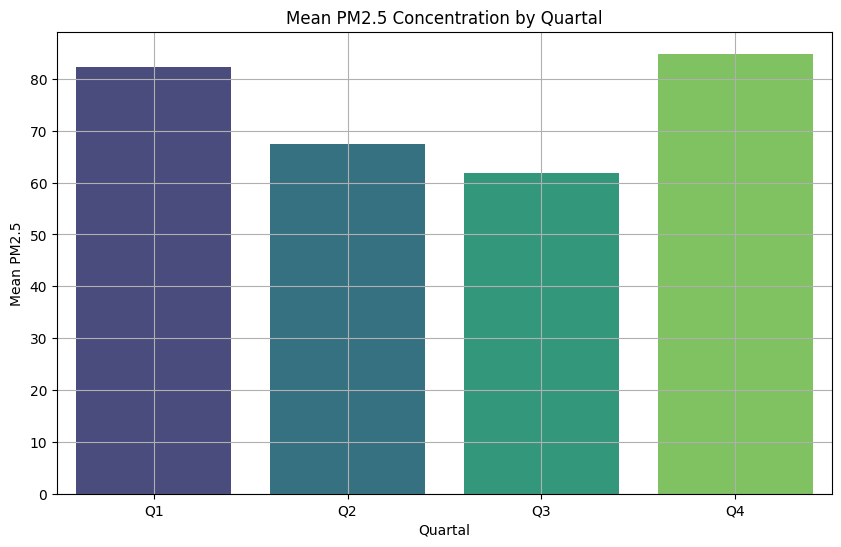

In [300]:
# Group by quartal and calculate the mean of PM25
quartal_avg_pm25 = used_df.groupby('quartal')['PM25'].mean().reset_index()

# Display the result
display(quartal_avg_pm25)
# Plot mean PM2.5 concentration by quartal
plt.figure(figsize=(10, 6))
sns.barplot(x='quartal', y='PM25', data=quartal_avg_pm25, palette='viridis')
plt.title('Mean PM2.5 Concentration by Quartal')
plt.ylabel('Mean PM2.5')
plt.xlabel('Quartal')
plt.grid(True)
plt.show()

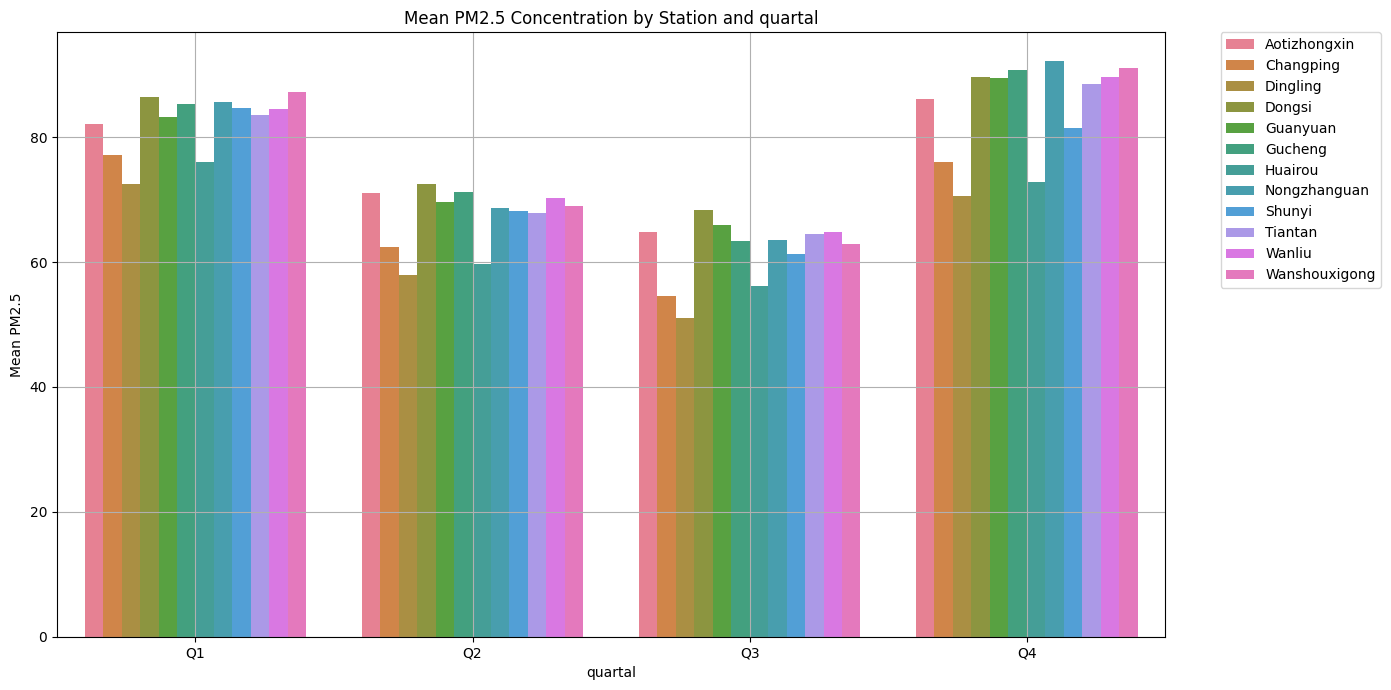

In [301]:
# Group by station and quartal
quartal_stats = used_df.groupby(['station', 'quartal'])['PM25'].agg(['mean', 'max', 'min']).reset_index()

# Plot mean PM2.5 concentration by station and quartal
plt.figure(figsize=(14, 7))
sns.barplot(x='quartal', y='mean', hue='station', data=quartal_stats)
plt.title('Mean PM2.5 Concentration by Station and quartal')
plt.ylabel('Mean PM2.5')
plt.xlabel('quartal')
plt.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 

plt.show()


### Pertanyaan 2:

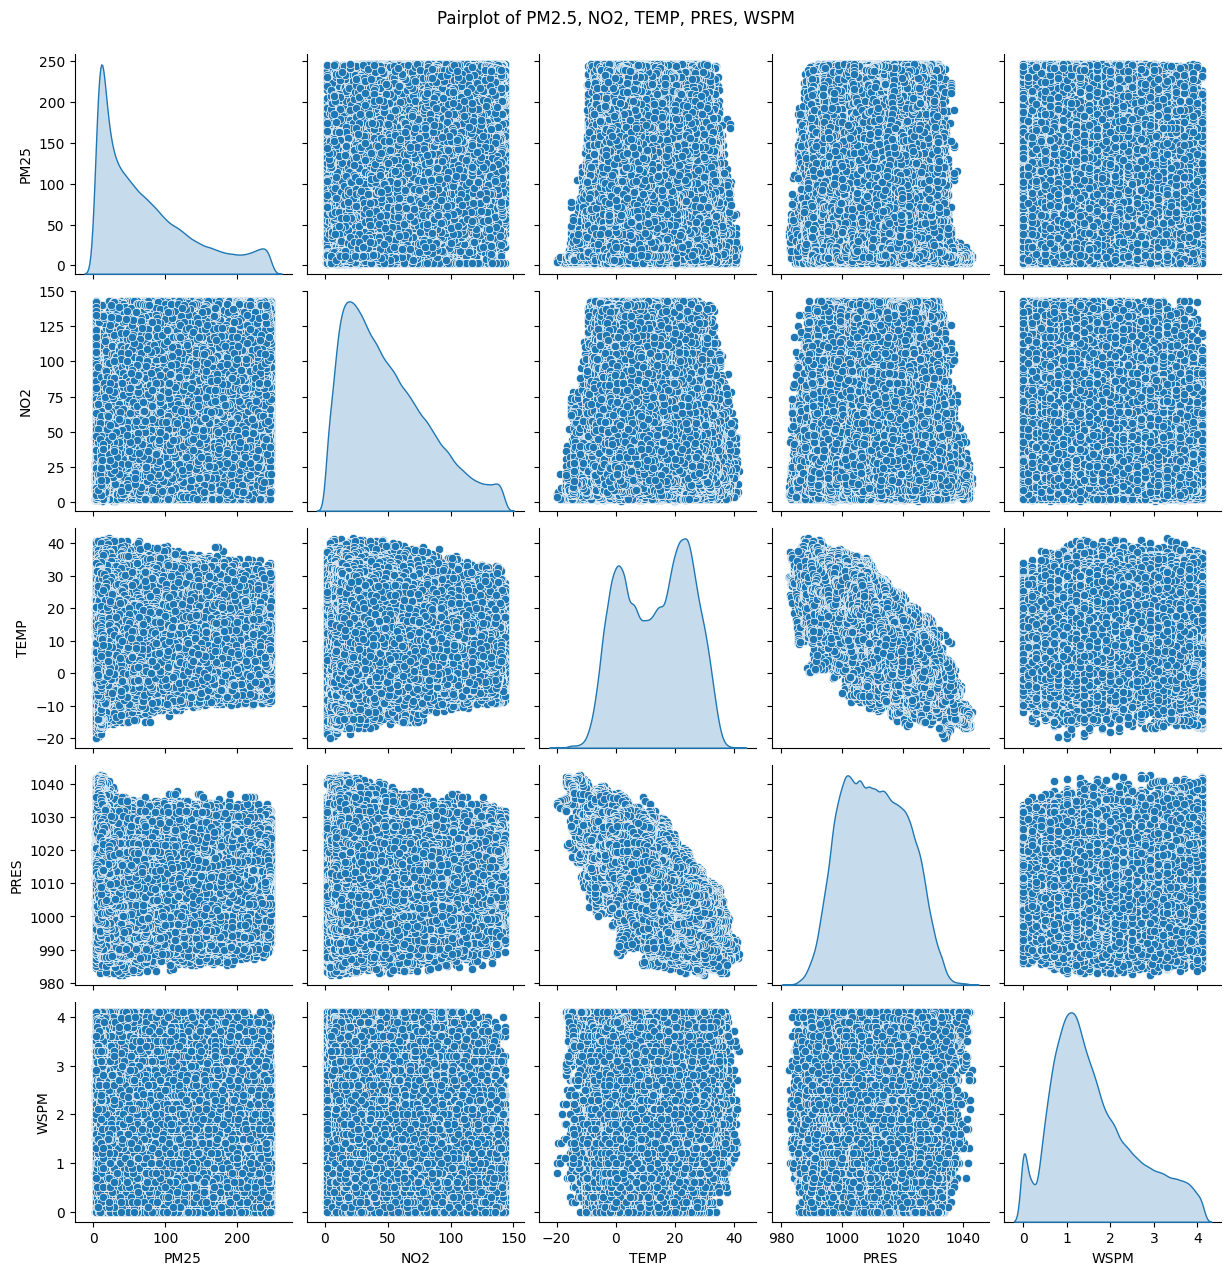

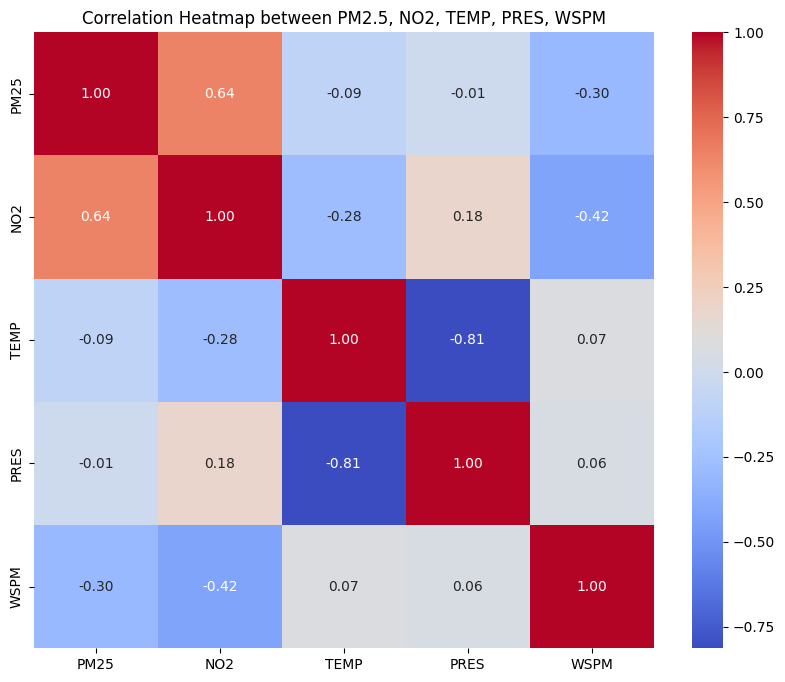

In [302]:
sns.pairplot(used_df[['PM25', 'NO2', 'TEMP', 'PRES', 'WSPM']], diag_kind='kde', markers='o')
plt.suptitle("Pairplot of PM2.5, NO2, TEMP, PRES, WSPM", y=1.02)

# Correlation heatmap for better clarity
plt.figure(figsize=(10, 8))
sns.heatmap(used_df[['PM25', 'NO2', 'TEMP', 'PRES', 'WSPM']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap between PM2.5, NO2, TEMP, PRES, WSPM")

plt.show()

**Insight:**
- Pada plot rata-rata (mean) PM2.5, terlihat bahwa konsentrasi rata-rata PM2.5 bervariasi antara station dan quartal.
  quartal 1 (Q1) dan quartal 4 (Q4) cenderung memiliki konsentrasi PM2.5 yang lebih tinggi dibandingkan dengan quartal 2 (Q2) dan quartal 3 (Q3). <br>
Station Aotizhongxin dan Wanliu konsisten menunjukkan rata-rata PM2.5 yang tinggi di hampir semua quartal, terutama di Q1 dan Q4. Hal ini menunjukkan bahwa di stasiun ini mungkin lebih rentan terhadap polusi udara. <br>
Station Shunyi dan Dingling menunjukkan konsentrasi PM2.5 yang lebih rendah dibandingkan dengan stasiun lainnya, terutama pada quartal 2 dan quartal 3.
- Terdapat hubungan yang cukup erat antara PM2.5 dan NO2, di mana peningkatan satu variabel cenderung diikuti oleh peningkatan yang lain.
Faktor cuaca seperti kecepatan angin memiliki pengaruh negatif pada konsentrasi PM2.5 dan NO2, membantu mengurangi konsentrasi polutan tersebut. <br>
Suhu juga mempengaruhi konsentrasi NO2, di mana suhu yang lebih tinggi berhubungan dengan konsentrasi NO2 yang lebih rendah, meskipun efek pada PM2.5 lebih lemah.
Tekanan udara tidak memiliki pengaruh signifikan terhadap PM2.5 maupun NO2.


## Conclusion

#### Conclution pertanyaan 1: <br>
- Pola konsentrasi PM2.5 menunjukkan adanya fluktuasi berdasarkan quartal (musim) dan station. Quartal 1 dan Quartal 4 (yang mungkin terkait dengan musim dingin) cenderung memiliki konsentrasi rata-rata PM2.5 yang lebih tinggi, sedangkan Quartal 2 dan Quartal 3 (musim panas) memiliki konsentrasi yang lebih rendah. <br><br>
- Station Wanliu tampak menonjol dengan konsentrasi PM2.5 yang konsisten tinggi baik pada rata-rata, maksimum, maupun minimum, mengindikasikan station ini sebagai daerah yang mungkin memiliki risiko polusi yang lebih parah. <br> <br>
#### Conclution pertanyaan 2
- Korelasi yang cukup kuat antara PM2.5 dan NO2 dengan nilai korelasi positif sekitar 0.64. Ini menunjukkan bahwa ketika konsentrasi PM2.5 meningkat, NO2 cenderung meningkat juga.
- Suhu (TEMP) memiliki korelasi yang lemah dan negatif dengan PM2.5 (-0.09). Artinya, ada sedikit kecenderungan konsentrasi PM2.5 menurun ketika suhu meningkat, tetapi pengaruhnya tidak signifikan.
- Tekanan udara (PRES) hampir tidak memiliki hubungan dengan PM2.5, dengan nilai korelasi sekitar -0.01, menunjukkan bahwa perubahan tekanan udara tidak berdampak signifikan terhadap konsentrasi PM2.5.
- Kecepatan angin (WSPM) memiliki korelasi negatif (-0.30), yang menunjukkan bahwa kecepatan angin yang lebih tinggi cenderung menurunkan konsentrasi PM2.5. Ini masuk akal karena angin dapat membantu menyebarkan partikel polutan di udara.

- Suhu (TEMP) memiliki korelasi negatif (-0.28) terhadap NO2. Ini menunjukkan bahwa pada suhu yang lebih tinggi, konsentrasi NO2 cenderung menurun.
- Tekanan udara (PRES) memiliki korelasi yang sangat rendah dengan NO2, jadi perubahan tekanan udara tidak banyak memengaruhi konsentrasi NO2.
- Kecepatan angin (WSPM) memiliki korelasi negatif yang cukup kuat dengan NO2 (-0.42), artinya kecepatan angin yang lebih tinggi membantu mengurangi konsentrasi NO2 di udara.

Ekstrak used_df menjadi file csv baru, dan simpan di folder dashboard

In [303]:
# cek apakah file main_data.csv sudah ada di dalam direktori dashboard, jika belum maka buat file tersebut di dalam direktori dashboard dengan used_df sebagai data
if os.path.exists('dashboard/main_data.csv'):
    print('File main_data.csv sudah ada di dalam direktori dashboard')
else:
    print('Membuat main_data.csv di dalam direktori dashboard')
    used_df.to_csv('dashboard/main_data.csv', index=False)

Membuat main_data.csv di dalam direktori dashboard
